In [197]:
#import library
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import os
import matplotlib.pyplot as plt
import numpy as np
from torchvision.utils import make_grid

In [198]:
#dataset path
data_dir = r"C:\Users\user\Documents\!TA\!TA\cornealtopography\Train_Validation sets\Train_Validation sets"


In [199]:
#preprocessing and augmentation
transform_aug = transforms.Compose([
    transforms.Resize((224, 224)), #input size for vgg16 is 224 x 224
    transforms.RandomHorizontalFlip(30), #images will be flipped with random angles
    transforms.RandomRotation(10), #same like b4 but rotate up to 10 degrees
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),  #random crop for more visible changes
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),  #color jitter to change brightness and contrast
    transforms.ToTensor(), #convert img to tensor
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) #normalization mean & std for ImageNet
])

transform_ori = transforms.Compose([
    transforms.Resize((224, 224)), #input size for vgg16 is 224 x 224
    transforms.ToTensor(), #convert img to tensor
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) #normalization mean & std for ImageNet
])

In [200]:
#load dataset ori
dataset_ori= datasets.ImageFolder(root=data_dir, transform=transform_ori)

#create dataset aug
dataset_aug = datasets.ImageFolder(root=data_dir, transform=transform_aug)

In [201]:
#check jpg
jpg_files = []
for idx, (image, label) in enumerate(dataset):
    image_path = dataset.imgs[idx][0]
    if image_path.lower().endswith('.jpg'):
        jpg_files.append(image_path)

#print jpg
print(f'Found {len(jpg_files)}.jpg images in the dataset:')
for file in jpg_files:
    print(file)

Found 2961.jpg images in the dataset:
C:\Users\user\Documents\!TA\!TA\cornealtopography\Train_Validation sets\Train_Validation sets\Keratoconus\case1\KCN_1_CT_A.jpg
C:\Users\user\Documents\!TA\!TA\cornealtopography\Train_Validation sets\Train_Validation sets\Keratoconus\case1\KCN_1_EC_A.jpg
C:\Users\user\Documents\!TA\!TA\cornealtopography\Train_Validation sets\Train_Validation sets\Keratoconus\case1\KCN_1_EC_P.jpg
C:\Users\user\Documents\!TA\!TA\cornealtopography\Train_Validation sets\Train_Validation sets\Keratoconus\case1\KCN_1_Elv_A.jpg
C:\Users\user\Documents\!TA\!TA\cornealtopography\Train_Validation sets\Train_Validation sets\Keratoconus\case1\KCN_1_Elv_P.jpg
C:\Users\user\Documents\!TA\!TA\cornealtopography\Train_Validation sets\Train_Validation sets\Keratoconus\case1\KCN_1_Sag_A.jpg
C:\Users\user\Documents\!TA\!TA\cornealtopography\Train_Validation sets\Train_Validation sets\Keratoconus\case1\KCN_1_Sag_P.jpg
C:\Users\user\Documents\!TA\!TA\cornealtopography\Train_Validation se

In [202]:
# #split dataset to training & validation
# train_size = int(0.8 * len(dataset)) #train size is 80% of the whole dataset
# val_size = len(dataset) - train_size #val size will be 20% bcs 100%-80%=20%

# train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

In [203]:
# #apply validation transform to validation dataset
# val_dataset.dataset.transform = transform_val

In [204]:
# #create dataloaders
# train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
# val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

# # #save dataloaders
# # print('Data Preprocessing Completed!')

In [205]:
# os.makedirs('preprocessed_data', exist_ok=True)
# torch.save(train_loader, 'preprocessed_data/train_loader.pth')
# torch.save(val_loader, 'preprocessed_data/val_loader.pth')

# print('Data preprocessing and DataLoader setup complete!')

In [206]:
#ensure same random seed
torch.manual_seed(42)
indices = torch.randperm(len(dataset_ori))

#batchsize
batch_size = 8

#fetch spesific batch of indices
selected_indices = indices[:batch_size]

#extract same image
original_images = torch.stack([dataset_ori[i][0] for i in selected_indices])
augmented_images = torch.stack([dataset_aug[i][0] for i in selected_indices])

In [207]:
#denormalize tensor imgs for visualization
def denormalize(tensor, mean, std) :
    mean = torch.tensor(mean).view(1, 3, 1, 1)
    std = torch.tensor(std).view(1, 3, 1, 1)
    
    tensor = tensor * std + mean
    return tensor.clamp(0, 1)

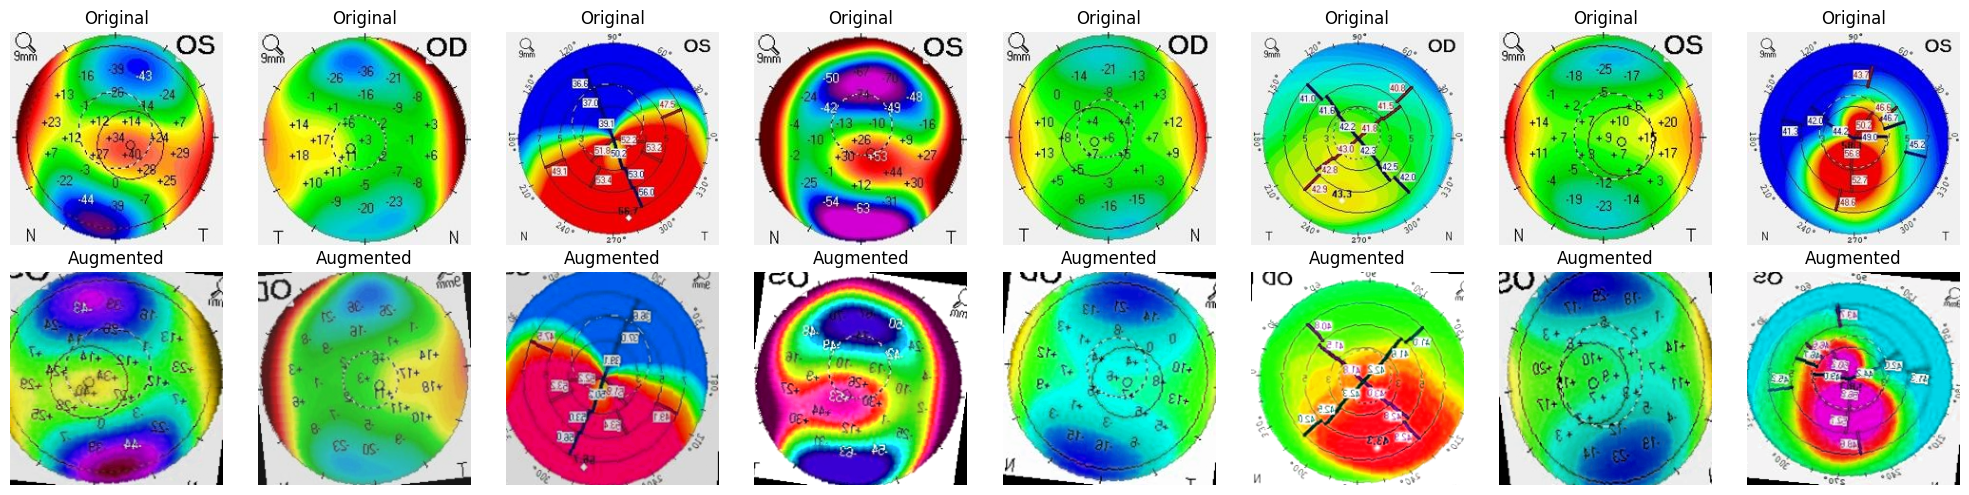

In [208]:
# Denormalize images for display
denormalized_original = denormalize(original_images, [0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
denormalized_augmented = denormalize(augmented_images, [0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

# Plot side-by-side comparison
fig, axes = plt.subplots(2, batch_size, figsize=(20, 5))

for i in range(batch_size):
    # Original image
    axes[0, i].imshow(np.transpose(denormalized_original[i].numpy(), (1, 2, 0)))
    axes[0, i].axis('off')
    axes[0, i].set_title("Original")

    # Augmented image
    axes[1, i].imshow(np.transpose(denormalized_augmented[i].numpy(), (1, 2, 0)))
    axes[1, i].axis('off')
    axes[1, i].set_title("Augmented")

plt.tight_layout()
plt.show()

In [209]:
# #denormalize batch for visualization
# denormalized_images = denormalize(images, [0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

In [210]:
# #create grid
# images_grid = make_grid(denormalized_images)

# #plot grid
# plt.figure(figsize=(12, 12))
# plt.imshow(np.transpose(images_grid.numpy(), (1, 2, 0)))
# plt.axis('off')
# plt.show()

# print('visualized a batch of images after augmentation')

In [211]:
# print(dataset.classes)
# for images, labels in dataset :
#     print(images.shape)
#     print(labels)
#     break